In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Label, Dropdown, Button, IntSlider, interact, Layout, Checkbox
from IPython.display import clear_output

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model


In [4]:
print(tf.__version__)

2.5.0


In [6]:
df_dataset = pd.read_csv("https://raw.githubusercontent.com/AGuyNextDoor/AProfNextDoor/main/Exercises/Hands%20on%20Machine%20Learning/house-prices-data/dataset.csv")

In [7]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error J')
  plt.legend()
  plt.grid(True)

In [160]:
X = df_dataset.drop("SalePrice", axis=1)
y = df_dataset["SalePrice"]

def generate_train_model(validation_size, normalizer_value, list_of_layers_size, loss_type, number_of_epochs, autostop_value):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size/100, random_state=42)

    normalizer = preprocessing.Normalization()
    normalizer.adapt(np.array(X_train))
    
    interactive_model_list = []
    
    if(normalizer_value): 
        interactive_model_list.append(normalizer)
        
    for layer_sizes in list_of_layers_size:
        interactive_model_list.append(layers.Dense(layer_sizes, activation='relu'))
        
    interactive_model_list.append(layers.Dense(1))
    
    interactive_model = keras.Sequential(interactive_model_list)
    
    interactive_model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.1),
        loss=loss_type)
    

    if(autostop_value):
        epoch_counter = 0
        lowest_score = np.Inf
        counter = 0
        convergence_count = 4
        
        epoch_fraction = int(number_of_epochs/100)
        
        if(number_of_epochs < 101):
            epoch_fraction = 10
        
        
        class HistoryClass():
            
            def __init__(self):
                self.history = {
                    'loss': [],
                    'val_loss': []
                }
                
                
        history = HistoryClass()
        
        while(epoch_counter <= number_of_epochs and convergence_count > 0):

            semi_history = interactive_model.fit(
                X_train, 
                y_train,
                epochs=epoch_fraction,
                verbose=0,
                validation_split = validation_size
            )
            
            history.history['loss'] = history.history['loss'] + semi_history.history['loss']
            history.history['val_loss'] = history.history['val_loss'] + semi_history.history['val_loss']
            

            if(lowest_score > np.min(semi_history.history['val_loss'])):
                lowest_score = np.min(semi_history.history['val_loss'])
            else : 
                convergence_count = convergence_count - 1

            epoch_counter += epoch_fraction
        
    else :
        history = interactive_model.fit(
            X_train, 
            y_train,
            epochs=number_of_epochs,
            verbose=0,
            validation_split = validation_size
        )
    
    score = interactive_model.evaluate(X_test, y_test)
    
    plot_loss(history)
    
    print("Score on test dataset : ", interactive_model.evaluate(X_test, y_test))

    prediction = interactive_model.predict(X_test) - y_test.values
    average_diff = np.mean(np.abs(prediction))
    
    print("Average dollar difference : ", average_diff)
    
    
    

1/1 [==============================] - 0s 12ms/step - loss: 10274.4346
Score on test dataset :  10274.4345703125
Average dollar difference :  97253.9365625


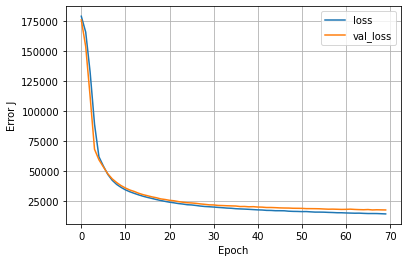

In [161]:
dataset_division = IntSlider(
  min=1,
  max=99,
  value=70, #Default value
  style={'description_width': 'initial'},
  orientation='vertical'
)

def map_not_in_place(l, fn):
    for i in range(len(l)):
        fn(l[i])

layers_nodes = [16, 32, 64, 128]

normalizer_dropdown = Dropdown(
   options=[True, False],
   value=True,
   description='Normalizer',
   disabled=False,
   style={'width': 'small'}
)

layer_1 = Dropdown(
   options=layers_nodes,
   value=layers_nodes[2],
   description='Layer 1',
   disabled=False,
   style={'description_width': ''}
)

layer_2 = Dropdown(
   options=layers_nodes,
   value=layers_nodes[2],
   description='Layer 2',
   disabled=False,
   style={'description_width': ''}
)

layer_3 = Dropdown(
   options=layers_nodes,
   value=layers_nodes[2],
   description='Layer 3',
   disabled=False,
   style={'description_width': ''}
)

layer_4 = Dropdown(
   options=layers_nodes,
   value=layers_nodes[2],
   description='Layer 4',
   disabled=False,
   style={'description_width': ''}
)

def button_layer_disabler(event):

    index = int(event.description[0])
    
    if(event.button_style == 'danger'):
        event.button_style = 'success'
        event.description = str(index)+": Active" 
    else: 
        event.button_style = 'danger'
        event.description = str(index)+": Inactive" 

disabler_blank = Button(
   description='',
   button_style='', # 'success', 'info', 'warning', 'danger' or '',
   disabled=True,
)

disabler_1 = Button(
   description='1: Active',
   button_style='success', # 'success', 'info', 'warning', 'danger' or ''
   disabled=False,
)
disabler_2 = Button(
   description='2: Active',
   button_style='success', # 'success', 'info', 'warning', 'danger' or ''
)
disabler_3 = Button(
   description='3: Active',
   button_style='success', # 'success', 'info', 'warning', 'danger' or ''
)
disabler_4 = Button(
   description='4: Active',
   button_style='success', # 'success', 'info', 'warning', 'danger' or ''
)

list_of_drops = [normalizer_dropdown, layer_1, layer_2, layer_3, layer_4]
list_of_buttons = [disabler_blank, disabler_1, disabler_2, disabler_3, disabler_4]

map_not_in_place(list_of_buttons, lambda x : x.on_click(button_layer_disabler) )

loss_list = ["mean_squared_error", "mean_absolute_error", 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error']

loss_dropdowns = Dropdown(
   options= loss_list,
   value=loss_list[0],
   description='',
   disabled=False,
   style={'width': '50px'}
)

number_of_max_epochs = IntSlider(
  min=1,
  max=2000,
  value=1000, #Default value
    step=10,
  style={'description_width': 'initial'},
)

autostop_checkbox = Checkbox(
    value=True,
    description="Auto stop training when convergence"
)

generate_button = widgets.Button(
   description='GENERATE',
   button_style='info', # 'success', 'info', 'warning', 'danger' or ''
   layout= Layout(display='flex',
                    margin="10%",
                    text='center'
                 )
)
loading_label = Label("", button_style="info")

def link_to_generation(event):
    
    loading_label.value = "Training..."

    ################

    validation_size = (100 - dataset_division.value)/100
    
    ################
    
    normalizer_value = normalizer_dropdown.value
    
    ################
    
    list_of_layers_size = []
    
    for index in range(0, len(list_of_buttons)):
        if(list_of_buttons[index].button_style == 'success'):
            list_of_layers_size.append(list_of_drops[index].value)
            
    ################
    
    loss_type = loss_dropdowns.value
    
    ################

    number_of_epochs = number_of_max_epochs.value
    
    
    ################
    
    autostop_value = autostop_checkbox.value
    
    generate_train_model(validation_size, normalizer_value, list_of_layers_size, loss_type, number_of_epochs, autostop_value)
    
    loading_label.value = "Done!"

generate_button.on_click(link_to_generation)

vertical_drops = VBox(list_of_drops)
vertical_buttons = VBox(list_of_buttons)

def box_layout_width(wid): 
    return Layout(display='flex',
                    padding="1%",
                    flex_flow='column',
                    align_items='center',
                    border='solid',
                    width= str(wid)+'%'
                 )

first_column = VBox([Label('% of training'), dataset_division], layout=box_layout_width(12))
second_column = VBox([Label('Number of nodes per Layer'), HBox([vertical_drops, vertical_buttons])], layout=box_layout_width(55))
third_column = VBox([Label('Types of Losses'), loss_dropdowns, Label('Number of Epochs'),number_of_max_epochs,autostop_checkbox, generate_button, loading_label], layout=box_layout_width(35))

HBox([first_column, second_column, third_column])